<a href="https://colab.research.google.com/github/Maucho6340/1764-estadistica-con-python-probabilidad-y-muestreo/blob/main/optimizacion_aeroportuaria_propio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='blue'>**CLASE UNO** EXPLORANDO LOS DATOS

In [1]:
import pandas as pd

datos=pd.read_csv('/content/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0.0,2010.0,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0.0,2010.0,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0.0,2010.0,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0.0,2010.0,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0.0,2010.0,False,15.016271


In [2]:
# Consultamos los metadatos o sea, los datos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20492 entries, 0 to 20491
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       20492 non-null  int64  
 1   airline         20492 non-null  object 
 2   aircraft_type   20492 non-null  object 
 3   schengen        20492 non-null  object 
 4   origin          20492 non-null  object 
 5   arrival_time    20492 non-null  float64
 6   departure_time  20492 non-null  float64
 7   day             20491 non-null  float64
 8   year            20491 non-null  float64
 9   is_holiday      20491 non-null  object 
 10  delay           20491 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.7+ MB


In [3]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,20492.000000,20492.000000,20492.000000,20491.000000,20491.000000,20491.000000
mean,15.366777,13.313301,16.518439,172.680494,2011.396857,12.588685
std,8.668625,4.020082,4.143864,102.300514,1.081969,23.293666
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-39.922816
25%,8.000000,8.939996,12.668655,85.000000,2010.000000,-4.498178
50%,15.000000,14.376052,17.967963,170.000000,2011.000000,9.729857
75%,23.000000,16.909690,20.041281,256.000000,2012.000000,27.784895
max,30.000000,19.341235,23.341235,364.000000,2013.000000,112.817711


In [4]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin,is_holiday
count,20492,20492,20492,20492,20491
unique,3,6,2,10,2
top,BZ,Airbus A320,schengen,TZF,False
freq,13706,8891,12281,4070,19381


Ya hicimos un análisis descriptivo y ahora vamos a hacer una análisis gráfico

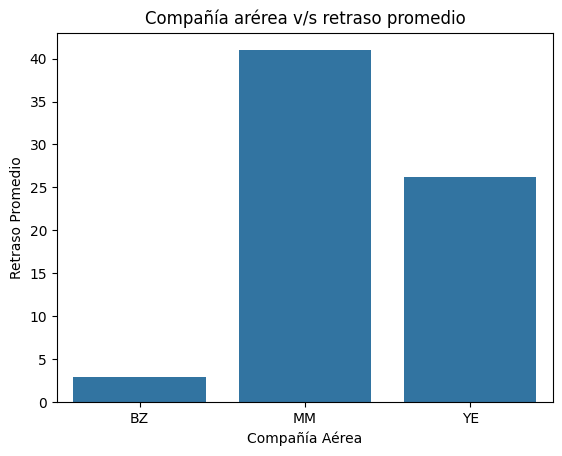

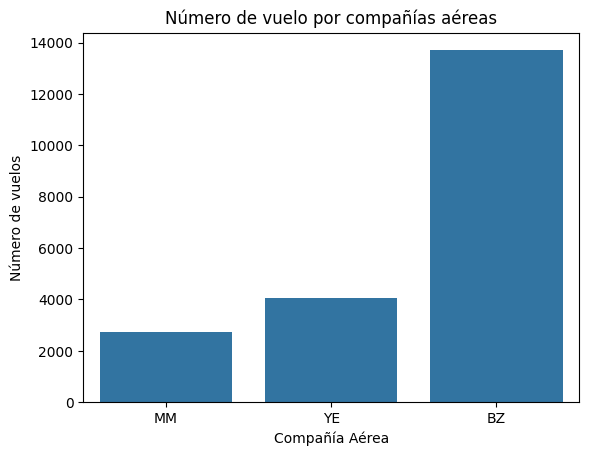

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañía arérea v/s retraso promedio')
plt.xlabel('Compañía Aérea')
plt.ylabel('Retraso Promedio')
plt.show()

sns.countplot(data=datos, x='airline')
plt.title('Número de vuelo por compañías aéreas')
plt.xlabel('Compañía Aérea')
plt.ylabel('Número de vuelos')
plt.show()

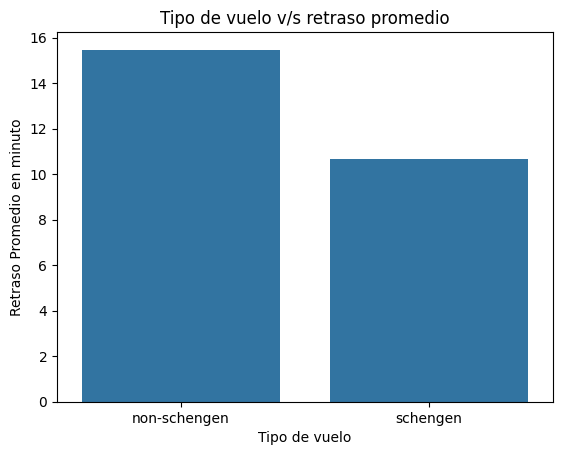

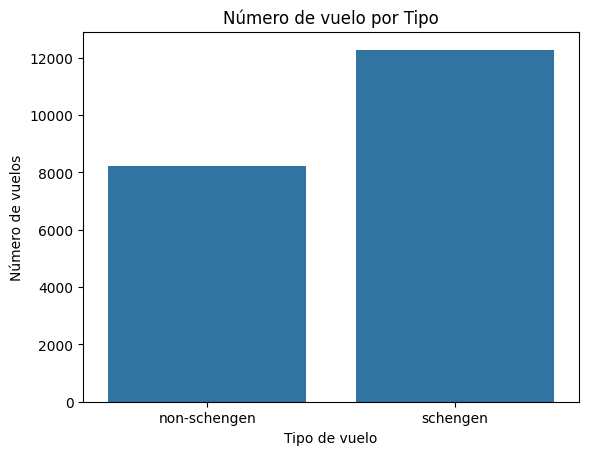

In [6]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo v/s retraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso Promedio en minuto')
plt.show()

sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelo por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

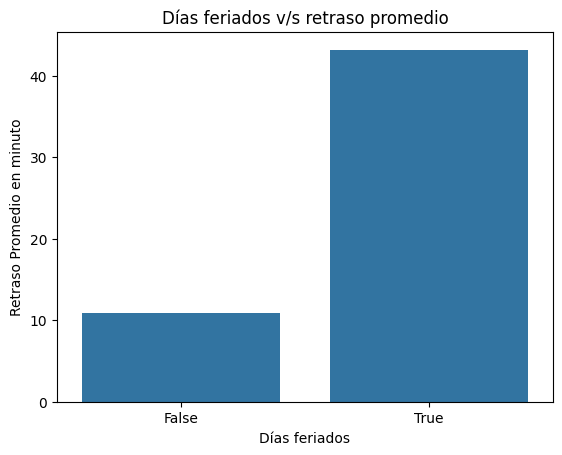

In [7]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados v/s retraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Retraso Promedio en minuto')
plt.show()

Para obtener el orden de los tipos de aeronaves

In [8]:
datos['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [9]:
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,8891
Airbus A330,4810
Boeing 787,2730
Embraer E175,2055
Boeing 737,1348
Boeing 777,658


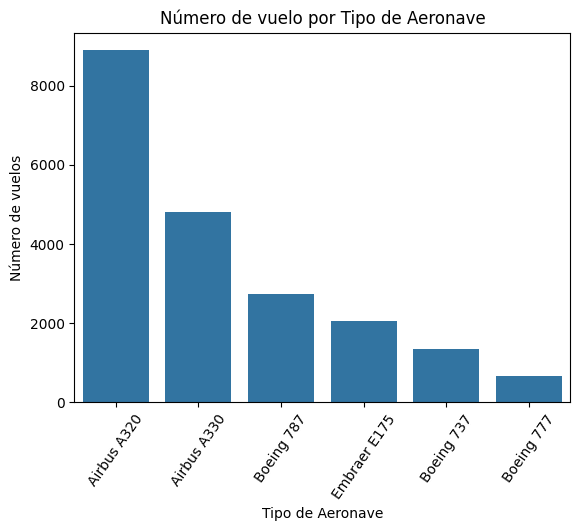

In [10]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Número de vuelo por Tipo de Aeronave')
plt.xticks(rotation=55)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

##### <font color='blue'>**Para saber más**: el Espacio Schengen

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

![Visualización](https://cdn1.gnarususercontent.com.br/6/103811/a742b8af-0a53-458a-b192-b4cbecbfd843.png) <br>

Fuente: Mapa del Espacio Schengen en 2017.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.

Para entender bien cómo están distribuidos los datos, vamos a utilizar el histograma, pero vamos a concentrarnos en datos relacionados con el atraso, o sea, horario de llegada, horario de salida y retrasos.<br>

Primero vamos a ver como está ditribuido nuestro horario de llegada

<Axes: xlabel='arrival_time', ylabel='Count'>

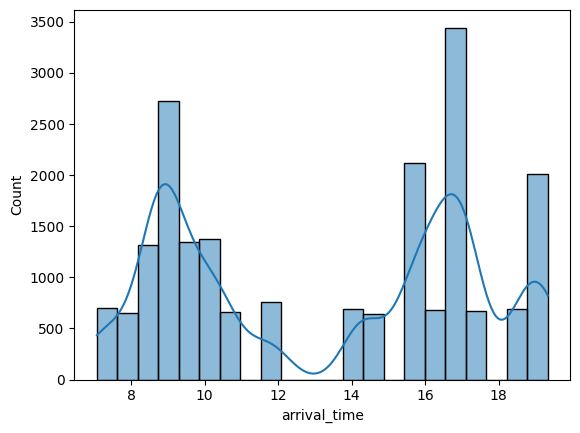

In [11]:
sns.histplot(data=datos,x='arrival_time',kde=True)

No parece ser que el ancho de los bin sea el adecuado y para ello nos basamos en la regla de Freedman y Diaconis<br>

![Visualización](https://wikimedia.org/api/rest_v1/media/math/render/svg/a80f81da3e4a82713b8a80c981b151d5d7aea241)

Que establece, según la fórmula, que el Ancho de los Bins es igual a 2 veces el valor intercuantil dividido por la raíz cúbica de la cantidad de observaciones.<br>

Mayores consultas en: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule


In [12]:
# Para recrear la fórmula de Freedman Diaconis
import numpy as np
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

In [13]:
binwidth = ancho_bin(datos,'arrival_time')
binwidth

np.float64(0.5824744645572607)

<Axes: xlabel='arrival_time', ylabel='Count'>

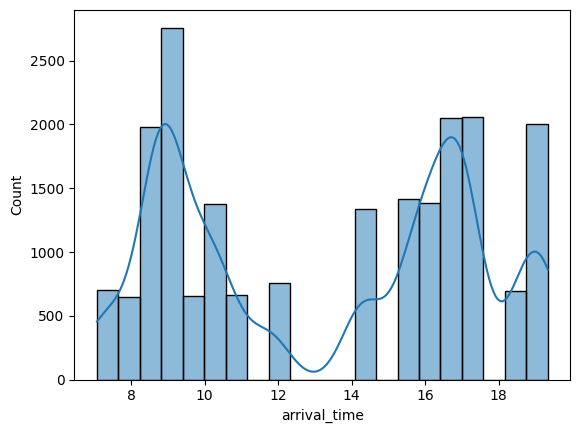

In [14]:
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

El apecto es bastante parecido, pero ahora si estamos convencidos que el ancho obedece a una regla matemática y no a una aprecición personal Podría incluso dar una valor al azar al binwidth.

<Axes: xlabel='arrival_time', ylabel='Count'>

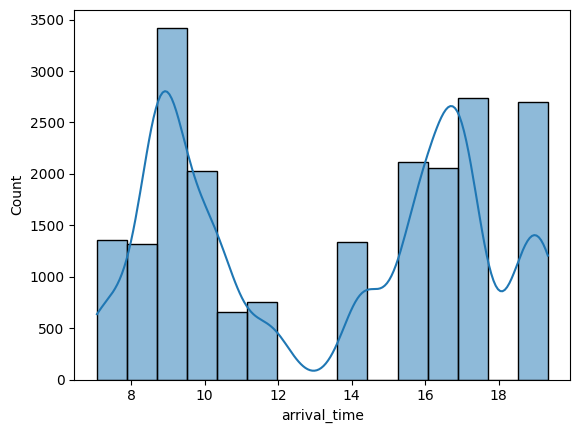

In [15]:
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=0.8)# tb puedo utilizar "bins=10" en vez de "binwidth"

En este caso el ancho no es el mas adecuado, pues la curva de densidad queda fuera de la cantidad de frecuencia:

Ahora vamos a visualizar el horario de llegada

<Axes: xlabel='departure_time', ylabel='Count'>

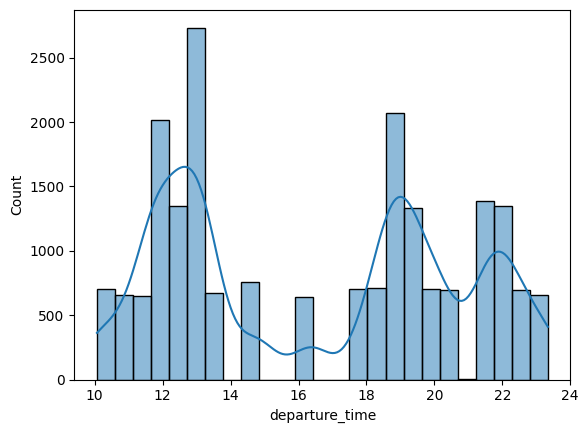

In [16]:
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

Observamos el horario de salida, la mayoría de las obervaciones están alrededor del mediodía y luego a las 13:00 hrs, y en la tarde el horario de llegada es alrededor de las 17:00 hrs y la salida alrededor de las 19:00 hrs.<br>
tenemos entonces una distribución bimodal. Pero lo que interesa es el gráfico de distribución de la variable respuesta que son los retrasos de los vuelos. Para ello avmos a generar una variable.

Ahora vamos a superponer el horario de salida con el de llegada

<Axes: xlabel='arrival_time', ylabel='Count'>

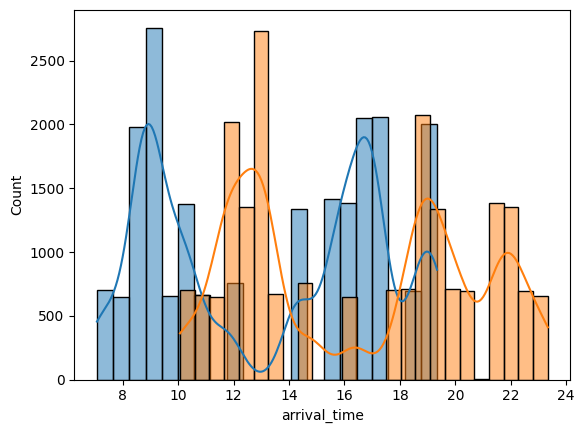

In [17]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos,x='arrival_time',kde=True,binwidth=binwidth)

binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos,x='departure_time',kde=True,binwidth=binwidth)

In [18]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()
print(f'El atraso promedio es: {atraso_promedio}')
print(f'El atraso mediano es: {atraso_mediana}')

El atraso promedio es: 12.588685218976504
El atraso mediano es: 9.729857344862095


Con estos datos vamos a generar dos gráficos, de caja e histograma.

ValueError: cannot convert float NaN to integer

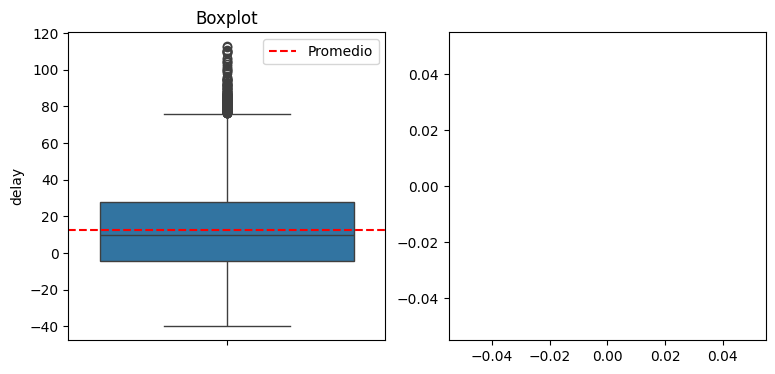

In [19]:
fig, ax = plt.subplots(1,2,figsize=(9,4))

sns.boxplot(data=datos, y='delay',ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

Podemos notar que la mediana está alrededor de 10 mnts y la mediana 12 mnts, que coincide con los valores cuando hicimos el describe; tb el valor max es de 75 mnts de retraso y el resto son outliers. En el Histograma, la mediana y promedio están muy cercanos, y el gráfico tiene una forma muy cercana a la distribución normal.

##### <font color='blue'>**Objetivo del boxplot**

El boxplot, también conocido como diagrama de caja, es una representación gráfica que nos permite visualizar la distribución de los datos de una forma más clara y objetiva. Está compuesto por: un rectángulo que representa la medianas y los cuartiles de los datos, además de líneas que se extienden hacia fuera del rectángulo, que muestran el rango de los datos, conforme a la imagen a continuación:

![Visualiación](https://cdn1.gnarususercontent.com.br/6/103811/b07ec596-6a09-4c20-a6ee-648223e5857f.png)

Donde:

- El límite inferior es el valor mínimo que un dato puede tener sin ser considerado un valor atípico (outlier). Se calcula como Q1 - 1,5 x IQR (donde IQR es el rango intercuartílico, es decir, la diferencia entre el tercer cuartil y el primer cuartil).
- El primer cuartil (Q1) es el valor que divide los datos en 25% por debajo y 75% por encima de él. Es decir, el 25% de los datos están por debajo del Q1 y el 75% están por encima.
- La mediana es el valor que divide los datos en 50% por debajo y 50% por encima de él.
- El tercer cuartil (Q3) es el valor que divide los datos en 75% por debajo y 25% por encima de él. Es decir, el 75% de los datos están por debajo del Q3 y el 25% están por encima.
- El límite superior es el valor máximo que un dato puede tener sin ser considerado un valor atípico. Se calcula como Q3 + 1,5 x IQR.

## <font color='blue'>**CLASE DOS** FEATURE ENGINEERING

La variable respuesta ya podemos utilizarla en un modelo machine learning.<br>
Ahora vamos a utilizar nuevas features o nuevos atributos, mas conocidos como Features Engineering, para ello, revisando nuestras columnas advertimos que tenemos una columna day y una año, pero no tenemos una columna fecha, por lo que podríamos crear la columna fecha a partir de esta dos columnas. Tanto day como year son enteros (Int64

In [20]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [21]:
#datos = datos.drop(columns=['datos'])
datos['date'] = datos['year'].astype(str)+'-'+(datos['day']+1).astype(str)
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0.0,2010.0,False,70.205981,2010.0-1.0
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0.0,2010.0,False,38.484609,2010.0-1.0
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0.0,2010.0,False,2.388305,2010.0-1.0
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0.0,2010.0,False,19.138491,2010.0-1.0
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0.0,2010.0,False,15.016271,2010.0-1.0


Ya tenemos la columna date que entrega el año y el día del año que en este caso es 1, o sea el primer día del año, por lo que podemos tomar esta columna date y aprovechar el método pandas to_datetime.

In [30]:
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.head(2)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,date_str,is_weekend,day_name
15,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,1,2010,False,-24.253940,2010-01-01,2010-1,False,Friday
16,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,1,2010,False,-6.318647,2010-01-01,2010-1,False,Friday


In [31]:
datos.sample(10)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,date_str,is_weekend,day_name
12723,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,118,2012,False,38.627272,2012-04-27,2012-118,False,Friday
5150,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,343,2010,False,29.778308,2010-12-09,2010-343,False,Thursday
6162,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,45,2011,False,7.837781,2011-02-14,2011-45,False,Monday
15659,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,313,2012,True,26.945215,2012-11-08,2012-313,False,Thursday
15088,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,275,2012,False,16.618120,2012-10-01,2012-275,False,Monday
16662,20,YE,Boeing 787,schengen,MWL,16.909690,18.909690,15,2013,False,-0.786506,2013-01-15,2013-15,False,Tuesday
9993,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,301,2011,False,15.928850,2011-10-28,2011-301,False,Friday
2973,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,198,2010,False,17.738323,2010-07-17,2010-198,True,Saturday
10897,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,361,2011,False,-0.793251,2011-12-27,2011-361,False,Tuesday
14147,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,213,2012,False,9.839640,2012-07-31,2012-213,False,Tuesday


También podemos crear una columna que indique si es fin de semana y que día de la semana es.

In [32]:
# Lunes=0, martes=1,...,sábado=5, domingo=6.
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name']=datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,date_str,is_weekend,day_name
19452,19,MM,Airbus A320,schengen,TZF,16.245220,19.245220,201,2013,False,37.066353,2013-07-20,2013-201,True,Saturday
3081,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,205,2010,False,-18.231917,2010-07-24,2010-205,True,Saturday
15206,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,283,2012,True,19.559044,2012-10-09,2012-283,False,Tuesday
18024,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,106,2013,False,-15.688397,2013-04-16,2013-106,False,Tuesday
1254,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,83,2010,False,12.851840,2010-03-24,2010-83,False,Wednesday


Ya tenemos nuevos atributos a partir del día y la fecha, sin embargo todavía tenemos muchas variables categóricas, y para poder modelar con machine learning, es necesario que tomemos estas variables y las codifiquemos.

##### <font color='blue'>**Para saber más**: ¿Qué es el feature engineering?

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**<br>
Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering**:<br>
1. Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.
1. Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo. <br>

**Técnicas de Feature Engineering**:<br>

Existen varias técnicas de feature engineering, incluyendo:

1. Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

1. Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

1. Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

## <font color='blue'>**Feature Encoding**

Machine lerning trabaja mejor cuendo nuestros datos están  codificados, es decir, variables numéricas y tenemos varios casos en nuestras variables que no lo son, como cadenas de caracteres o booleano. Por ello, vamos a tomar nuevamente la información de nuestra metadatos, para saber qué tipo de columnas tenemos.

In [36]:
# Para ignorar las advertencias que instala Python al entregar resultados
import warnings
warnings.filterwarnings('ignore')

In [37]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20431 entries, 15 to 20490
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       20431 non-null  int64         
 1   airline         20431 non-null  object        
 2   aircraft_type   20431 non-null  object        
 3   schengen        20431 non-null  object        
 4   origin          20431 non-null  object        
 5   arrival_time    20431 non-null  float64       
 6   departure_time  20431 non-null  float64       
 7   day             20431 non-null  int64         
 8   year            20431 non-null  int64         
 9   is_holiday      20431 non-null  int64         
 10  delay           20431 non-null  float64       
 11  date            20431 non-null  datetime64[ns]
 12  date_str        20431 non-null  object        
 13  is_weekend      20431 non-null  int64         
 14  day_name        20431 non-null  object        
 15  chenge

Entonces tenemos que  la columnas: airline, aircraft_type, schengen y origin, son de tipo cadena de caracteres y hay que codificarlas. También tenemos variables tipo bool como is_weekend, is_holiday. Tambien la variable schengen que además de ser cadena de caracteres (str), también es boolena, pues solo tiene dos valores: schengen o no_schengen. Entonces haremos las modificaciones.

Primero las booleanas

In [38]:
datos['chengen'] = datos['schengen'].replace({'non_schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,date_str,is_weekend,day_name,chengen
15728,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,318,2012,0,-0.465150,2012-11-13,2012-318,0,Tuesday,non-schengen
7035,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,104,2011,0,50.363691,2011-04-14,2011-104,0,Thursday,non-schengen
18898,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,164,2013,0,-26.499903,2013-06-13,2013-164,0,Thursday,1


Ahora vamos con las variables object (str)

In [41]:
categoricas = ['airline','aircraft_type','origin','day_name']

pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,date_str,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
15,13,non-schengen,10.172731,13.172731,1,2010,0,-24.253940,2010-01-01,2010-1,...,1,0,0,1,0,0,0,0,0,0
16,5,schengen,9.344097,12.344097,1,2010,0,-6.318647,2010-01-01,2010-1,...,0,0,1,1,0,0,0,0,0,0
17,8,schengen,15.729617,18.729617,1,2010,0,-3.478164,2010-01-01,2010-1,...,0,0,1,1,0,0,0,0,0,0
18,25,non-schengen,19.341235,23.341235,1,2010,0,4.007850,2010-01-01,2010-1,...,0,0,0,1,0,0,0,0,0,0
19,6,schengen,17.033688,19.033688,1,2010,0,9.377577,2010-01-01,2010-1,...,0,0,0,1,0,0,0,0,0,0


In [42]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,date_str,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
16,5,schengen,9.344097,12.344097,1,2010,0,-6.318647,2010-01-01,2010-1,...,0,0,1,1,0,0,0,0,0,0
17,8,schengen,15.729617,18.729617,1,2010,0,-3.478164,2010-01-01,2010-1,...,0,0,1,1,0,0,0,0,0,0
15,13,non-schengen,10.172731,13.172731,1,2010,0,-24.253940,2010-01-01,2010-1,...,1,0,0,1,0,0,0,0,0,0
19,6,schengen,17.033688,19.033688,1,2010,0,9.377577,2010-01-01,2010-1,...,0,0,0,1,0,0,0,0,0,0
18,25,non-schengen,19.341235,23.341235,1,2010,0,4.007850,2010-01-01,2010-1,...,0,0,0,1,0,0,0,0,0,0


Ya tenemos nuestra variables categorizadas y casi listas para introducirlas en nuestro modelo de machine learning. Pero es necesario analizar un poco mejor las variables que estamos utilizando, por que hay casos en los cuales las variables se comportan de manera muy semejante y puden acabar perjudicando el modelo. Por ejemplo los horarios de llegada como los de salida, tenían un comportamiento muy semejante, ambos tenían una distribución bimodal por lo que se parecen mucho, pero la pregunta es, cómo podemos validar lo que estamos diciendo. Para ello utilizaremos un metodo de pandas que son las "correlaciones". Un mapa de correlaciones, nos indicará como se relaciona una variable respecto de otra; y la correlación puede ser "+" ó "-", varía de -1 a +1.<br>
- Correlación de 0 a -1: La variación es inversamente proporcional, p.ej.: mientras mas se demora en salir un vuelo, menos satisfacción tienen los clientes
- Correlación de 0 a +1: La variación es directamente proporcional, p.ej.: Mientras menos se demora la aerolínea en preparar una aeronave, menor va a ser la demora.

In [44]:
# Correlación entre los tiempos de llegada y los ptiempos de salida
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973575
departure_time,0.973575,1.000000


Existe una relación muy fuerte, casi de un 100%, por lo que estas variables en conjunto pueden acabar sezgando mi modelo y debo escoger sólo una.

In [45]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 15 to 19
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   5 non-null      int64         
 1   schengen                    5 non-null      object        
 2   arrival_time                5 non-null      float64       
 3   departure_time              5 non-null      float64       
 4   day                         5 non-null      int64         
 5   year                        5 non-null      int64         
 6   is_holiday                  5 non-null      int64         
 7   delay                       5 non-null      float64       
 8   date                        5 non-null      datetime64[ns]
 9   date_str                    5 non-null      object        
 10  is_weekend                  5 non-null      int64         
 11  chengen                     5 non-null      object        
 12  a

Al revisar nuevamente los metadatos, ya cree variables a partir de variables str y bool. Y como ya tengo las variables codificadas, las originales las puedo remover. date, year, flight_id (ésta última no me da ningún patrón de identificación)

In [51]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,date_str,is_weekend,chengen,airline_BZ,airline_MM,airline_YE,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
19,schengen,17.033688,0,9.377577,2010-1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
18,non-schengen,19.341235,0,4.007850,2010-1,0,non-schengen,1,0,0,...,0,0,0,1,0,0,0,0,0,0
16,schengen,9.344097,0,-6.318647,2010-1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
17,schengen,15.729617,0,-3.478164,2010-1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
15,non-schengen,10.172731,0,-24.253940,2010-1,0,non-schengen,1,0,0,...,1,0,0,1,0,0,0,0,0,0


##### <font color='blue'> **Manos a la obra**: ¿Cómo utilizar el OneHotEncoder de Sklearn?

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

In [ ]:
#categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
#df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
#df_encoded.head()

¡Ahora es el momento de poner en práctica otro enfoque!

Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.

Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

In [ ]:
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder

#categoricas = ['airline','aircraft_type','origin','day_name']

#one_hot_enc = make_column_transformer(
#    (OneHotEncoder(handle_unknown='ignore'),
#    categoricas),
#    remainder='passthrough')

#datos = one_hot_enc.fit_transform(datos)
#datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
#datos

Analizando el código anterior paso a paso:

1. **from sklearn.compose import make_column_transformer**: Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

2. **from sklearn.preprocessing import OneHotEncoder**: Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

3. **categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']**: Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

4. **one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')**: Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

5. **datos = one_hot_enc.fit_transform(datos)**: Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

6. **datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())**: Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame.<br>
 También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

## <font color='blue'>**03 elección y validación del modelo**